This script downloads SCSN broadband data to look at waveform polarization near the B1 line during local and teleseismic events.

All seismic data will be analyzed using Python and the seismological toolbox Obspy. Obspy is the most popular tool to handle seismic data and metadata in seismology. You can check out the docs here: https://docs.obspy.org/tutorial/


Install the package on the Google cloud instance

In [1]:
!pip install obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 61.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


**Please restart the runtime (Runtime -> Restart runtime)**
Downloading earthquake catalogs will not work without resetting the runtime. This fixes a bug from Obspy.


### Import Libraries and modules
We'll use these python modules:
  - numpy: Arrays and math functions
  - matplotlib.pyplot: plotting 
  - Obspy: Plotting focal mechanisms and downloading earthquake catalogs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy.clients.fdsn.client import Client 
import pandas as pd
from numpy import cos,sin,arctan2,sqrt, pi
from scipy.signal import decimate, butter,filtfilt
from scipy.io import loadmat
import h5py

In [3]:
dt=0.01
f1,f2=0.1,0.2
Fnyq = 0.5//dt
low = f1 / Fnyq
high = f2 / Fnyq
b, a = butter(2, [low, high], btype='band')

# This is a local M3.97 , julian day 316

9 Trace(s) in Stream:
CI.PDU..HHE | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.PDU..HHN | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.PDU..HHZ | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.PSR..HHE | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.PSR..HHN | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.PSR..HHZ | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.RIO..HHE | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.RIO..HHN | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples
CI.RIO..HHZ | 2019-11-12T02:13:51.998300Z - 2019-11-12T02:17:11.998300Z | 100.0 Hz, 20001 samples


Text(0.5, 0, 'Time in (s)')

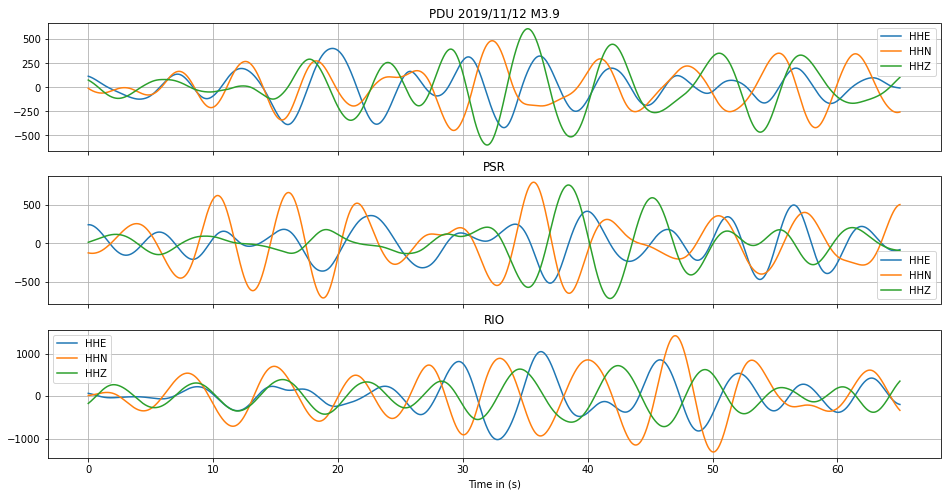

In [ ]:
# Local event waveforms download
t1 = obspy.UTCDateTime(2019,11,12,2,13,52)
client = Client("SCEDC") # connect to IRIS earthquake service
tr=client.get_waveforms(network="CI",station="PDU,PSR,RIO",location="*",channel="HH*",starttime=t1,endtime=t1+200)
tr.filter('bandpass', freqmin=f1, freqmax=f2, corners=2, zerophase=True)
print(tr)
fig,ax=plt.subplots(3,1,figsize=(16,8),sharex=True)

istart=6500
iend=13000
t=np.linspace(0,(iend-istart)/100,(iend-istart))

ax[0].plot(t,tr[0].data[istart:iend])
ax[0].plot(t,tr[1].data[istart:iend])
ax[0].plot(t,tr[2].data[istart:iend])
ax[0].grid(True)
ax[0].set_title(tr[0].stats.station+" 2019/11/12 M3.9")
ax[0].legend((str(tr[0].stats.channel),str(tr[1].stats.channel),str(tr[2].stats.channel)))

ax[1].plot(t,tr[3].data[istart:iend])
ax[1].plot(t,tr[4].data[istart:iend])
ax[1].plot(t,tr[5].data[istart:iend])
ax[1].grid(True)
# ax[1].set_xlim(7000,12500)
ax[1].set_title(tr[3].stats.station)
ax[1].legend((str(tr[3].stats.channel),str(tr[4].stats.channel),str(tr[5].stats.channel)))

ax[2].plot(t,tr[6].data[istart:iend])
ax[2].plot(t,tr[7].data[istart:iend])
ax[2].plot(t,tr[8].data[istart:iend])
ax[2].grid(True)
# ax[2].set_xlim(7000,12500)
ax[2].set_title(tr[6].stats.station)
ax[2].legend((str(tr[6].stats.channel),str(tr[7].stats.channel),str(tr[8].stats.channel)))
ax[2].set_xlabel('Time in (s)')

In [ ]:
# Now let's compare with B1 stations

ff = "/content/drive/Shared drives/BASIN/DATA/sample_events/316.h5"
if 'f' in locals(): f.close()
f = h5py.File(ff,'r')
# cc_len, maxlag = f['meta']['cc_len'][...], f['meta']['maxlag'][...]
L_sta = list(f.keys())
LL = list(f[L_sta[0]]) ;LLL=list(f[L_sta[0]][LL[0]])
data=f[L_sta[0]][LL[0]][LLL[0]][:]
d_len = max(data.shape)
# fs = (d_len - 1) / 2 / maxlag
print(f)
print(L_sta)
print(LL)

<HDF5 file "316.h5" (mode r)>
['B1002', 'B1003', 'B1004', 'B1005', 'B1006', 'B1007', 'B1008', 'B1009', 'B1010', 'B1011', 'B1012', 'B1013', 'B1014', 'B1016', 'B1017', 'B1018', 'B1019', 'B1020', 'B1021', 'B1022', 'B1023', 'B1025', 'B1026', 'B1027', 'B1028', 'B1029', 'B1030', 'B1031', 'B1032', 'B1033', 'B1034', 'B1035', 'B1036', 'B1037', 'B1038', 'B1039', 'B1040', 'B1041', 'B1042', 'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048', 'B1049', 'B1050', 'B1051', 'B1052', 'B1053', 'B1054', 'B1055', 'B1056', 'B1057', 'B1058', 'B1061', 'B1062', 'B1063', 'B1064', 'B1065', 'B1066', 'B1067', 'B1068', 'B1069', 'B1070', 'B1071', 'B1072', 'B1073', 'B1074', 'B1075', 'B1076', 'B1077', 'B1078', 'B1079', 'B1080', 'B1081', 'B1082', 'B1083', 'B1085', 'B1086', 'B1087', 'B1088', 'B1089', 'B1090', 'B1091', 'B1092', 'B1093', 'B1094', 'B1095', 'B1096', 'B1097', 'B1098', 'B1099', 'B1100', 'B1110', 'B1112', 'B1113', 'B1114', 'B1115', 'B1116', 'B1117', 'B1118', 'B1119', 'B1120', 'B1121', 'B1122', 'B1123', 'B1124

In [ ]:
print(list(f[L_sta[-1]]))

['date', 'datetime', 'julian', 'lat', 'lon', 'magnitude']


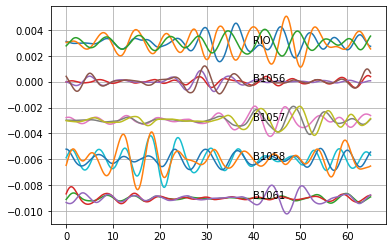

In [ ]:
#Pair RIO with the B1

B1_RIO = ["B1056","B1057","B1058","B1061"]

plt.plot(t,tr[6].data[istart:iend]/7e5+0.003)
plt.plot(t,tr[7].data[istart:iend]/7e5+0.003)
plt.plot(t,tr[8].data[istart:iend]/7e5+0.003)
plt.text(40,0.003 ,'RIO')
plt.grid(True)
for ii,ib in enumerate(B1_RIO):
  # ik = np.where(np.array(L_sta)==ib)[0]
  data=np.zeros(shape=(3,len(f[ib][LL[0]][LLL[0]][:])))
  data[0,:] = filtfilt(b,a,f[ib][LL[0]][LLL[0]][:])
  data[1,:] = filtfilt(b,a,f[ib][LL[1]][LLL[0]][:])
  data[2,:] = filtfilt(b,a,f[ib][LL[2]][LLL[0]][:])

  # print(ik)
  plt.plot(t,data[:,istart:iend].transpose()-0.003*ii)
  plt.text(40,-.003*ii ,ib)


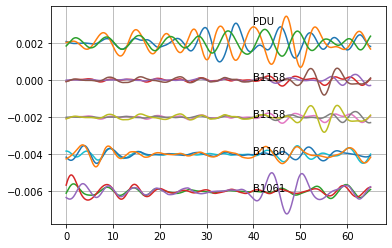

In [ ]:
#Pair RIO with the B1

B1_PDU = ["B1158","B1158","B1160","B1061"]

plt.plot(t,tr[6].data[istart:iend]/1e6+0.002)
plt.plot(t,tr[7].data[istart:iend]/1e6+0.002)
plt.plot(t,tr[8].data[istart:iend]/1e6+0.002)
plt.text(40,0.003 ,'PDU')
plt.grid(True)
for ii,ib in enumerate(B1_PDU):
  # ik = np.where(np.array(L_sta)==ib)[0]
  data=np.zeros(shape=(3,len(f[ib][LL[0]][LLL[0]][:])))
  data[0,:] = filtfilt(b,a,f[ib][LL[0]][LLL[0]][:])
  data[1,:] = filtfilt(b,a,f[ib][LL[1]][LLL[0]][:])
  data[2,:] = filtfilt(b,a,f[ib][LL[2]][LLL[0]][:])

  # print(ik)
  plt.plot(t,data[:,istart:iend].transpose()-0.002*ii)
  plt.text(40,-.002*ii ,ib)


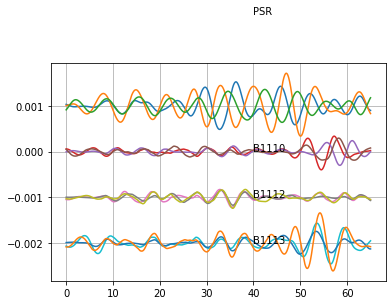

In [ ]:
#Pair RIO with the B1

B1_PSR = ["B1110","B1112","B1113"]

plt.plot(t,tr[6].data[istart:iend]/2e6+0.001)
plt.plot(t,tr[7].data[istart:iend]/2e6+0.001)
plt.plot(t,tr[8].data[istart:iend]/2e6+0.001)
plt.text(40,0.003 ,'PSR')
plt.grid(True)
for ii,ib in enumerate(B1_PSR):
  # ik = np.where(np.array(L_sta)==ib)[0]
  data=np.zeros(shape=(3,len(f[ib][LL[0]][LLL[0]][:])))
  data[0,:] = filtfilt(b,a,f[ib][LL[0]][LLL[0]][:])
  data[1,:] = filtfilt(b,a,f[ib][LL[1]][LLL[0]][:])
  data[2,:] = filtfilt(b,a,f[ib][LL[2]][LLL[0]][:])

  # print(ik)
  plt.plot(t,data[:,istart:iend].transpose()-0.001*ii)
  plt.text(40,-.001*ii ,ib)


# Local quake, 3.9, julian day 317
actually not seen in seismograms

9 Trace(s) in Stream:
CI.PDU..HHE | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.PDU..HHN | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.PDU..HHZ | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.PSR..HHE | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.PSR..HHN | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.PSR..HHZ | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.RIO..HHE | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.RIO..HHN | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples
CI.RIO..HHZ | 2019-11-13T19:26:52.998300Z - 2019-11-13T20:00:12.998300Z | 100.0 Hz, 200001 samples


Text(0.5, 0, 'Time in (s)')

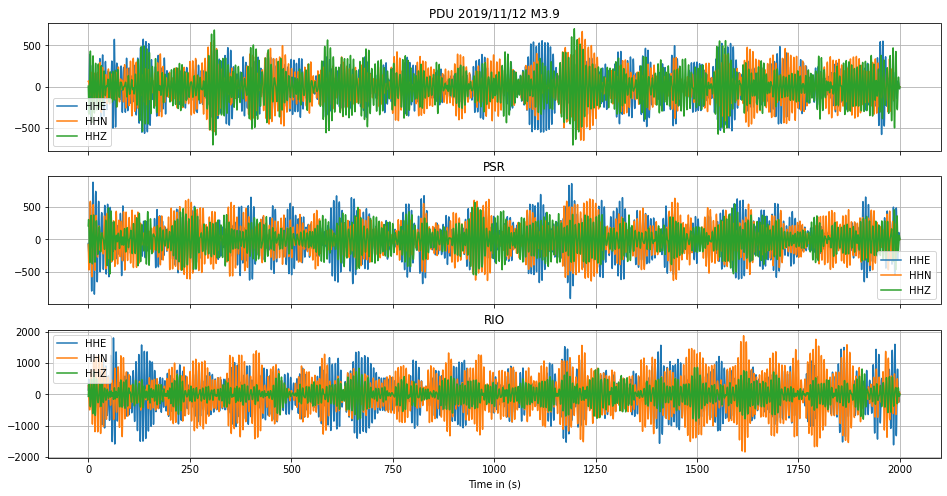

In [ ]:
# Local event waveforms download
t1 = obspy.UTCDateTime(2019,11,13,19,26,53)
client = Client("SCEDC") # connect to IRIS earthquake service
tr=client.get_waveforms(network="CI",station="PDU,PSR,RIO",location="*",channel="HH*",starttime=t1,endtime=t1+2000)
tr.filter('bandpass', freqmin=f1, freqmax=f2, corners=2, zerophase=True)
print(tr)
fig,ax=plt.subplots(3,1,figsize=(16,8),sharex=True)

istart=0
iend=len(tr[0].data)
t=np.linspace(0,(iend-istart)/100,(iend-istart))

ax[0].plot(t,tr[0].data[istart:iend])
ax[0].plot(t,tr[1].data[istart:iend])
ax[0].plot(t,tr[2].data[istart:iend])
ax[0].grid(True)
ax[0].set_title(tr[0].stats.station+" 2019/11/12 M3.9")
ax[0].legend((str(tr[0].stats.channel),str(tr[1].stats.channel),str(tr[2].stats.channel)))

ax[1].plot(t,tr[3].data[istart:iend])
ax[1].plot(t,tr[4].data[istart:iend])
ax[1].plot(t,tr[5].data[istart:iend])
ax[1].grid(True)
# ax[1].set_xlim(7000,12500)
ax[1].set_title(tr[3].stats.station)
ax[1].legend((str(tr[3].stats.channel),str(tr[4].stats.channel),str(tr[5].stats.channel)))

ax[2].plot(t,tr[6].data[istart:iend])
ax[2].plot(t,tr[7].data[istart:iend])
ax[2].plot(t,tr[8].data[istart:iend])
ax[2].grid(True)
# ax[2].set_xlim(7000,12500)
ax[2].set_title(tr[6].stats.station)
ax[2].legend((str(tr[6].stats.channel),str(tr[7].stats.channel),str(tr[8].stats.channel)))
ax[2].set_xlabel('Time in (s)')

In [ ]:
# Now let's compare with B1 stations

ff = "/content/drive/Shared drives/BASIN/DATA/sample_events/317.h5"
if 'f' in locals(): f.close()
f = h5py.File(ff,'r')
# cc_len, maxlag = f['meta']['cc_len'][...], f['meta']['maxlag'][...]
L_sta = list(f.keys())
LL = list(f[L_sta[0]]) ;LLL=list(f[L_sta[0]][LL[0]])
data=f[L_sta[0]][LL[0]][LLL[0]][:]
d_len = max(data.shape)
# fs = (d_len - 1) / 2 / maxlag
print(f)
print(L_sta)
print(LL)

<HDF5 file "317.h5" (mode r)>
['B1002', 'B1003', 'B1004', 'B1005', 'B1006', 'B1007', 'B1008', 'B1009', 'B1010', 'B1011', 'B1012', 'B1013', 'B1014', 'B1016', 'B1017', 'B1018', 'B1019', 'B1020', 'B1021', 'B1022', 'B1023', 'B1025', 'B1026', 'B1027', 'B1028', 'B1029', 'B1030', 'B1031', 'B1032', 'B1033', 'B1034', 'B1035', 'B1036', 'B1037', 'B1038', 'B1039', 'B1040', 'B1041', 'B1042', 'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048', 'B1049', 'B1050', 'B1051', 'B1052', 'B1053', 'B1054', 'B1055', 'B1056', 'B1057', 'B1058', 'B1061', 'B1062', 'B1063', 'B1064', 'B1065', 'B1066', 'B1067', 'B1068', 'B1069', 'B1070', 'B1071', 'B1072', 'B1073', 'B1074', 'B1075', 'B1076', 'B1077', 'B1078', 'B1079', 'B1080', 'B1081', 'B1082', 'B1083', 'B1085', 'B1086', 'B1087', 'B1088', 'B1089', 'B1090', 'B1091', 'B1092', 'B1093', 'B1094', 'B1095', 'B1096', 'B1097', 'B1098', 'B1099', 'B1100', 'B1110', 'B1112', 'B1113', 'B1114', 'B1115', 'B1116', 'B1117', 'B1118', 'B1119', 'B1120', 'B1121', 'B1122', 'B1123', 'B1124

(0.0, 200.0)

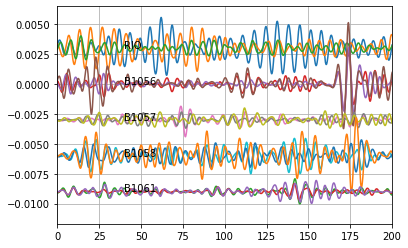

In [ ]:
#Pair RIO with the B1

B1_RIO = ["B1056","B1057","B1058","B1061"]

istart=0
iend2=len(f["B1056"][LL[0]][LLL[0]][:])
t2=np.linspace(0,(iend2-istart)/100,(iend2-istart))

plt.plot(t,tr[6].data[istart:iend]/7e5+0.003)
plt.plot(t,tr[7].data[istart:iend]/7e5+0.003)
plt.plot(t,tr[8].data[istart:iend]/7e5+0.003)
plt.text(40,0.003 ,'RIO')
plt.grid(True)
for ii,ib in enumerate(B1_RIO):
  # ik = np.where(np.array(L_sta)==ib)[0]
  data=np.zeros(shape=(3,len(f[ib][LL[0]][LLL[0]][:])))
  data[0,:] = filtfilt(b,a,f[ib][LL[0]][LLL[0]][:])
  data[1,:] = filtfilt(b,a,f[ib][LL[1]][LLL[0]][:])
  data[2,:] = filtfilt(b,a,f[ib][LL[2]][LLL[0]][:])

  # print(ik)
  plt.plot(t2,data[:,istart:iend2].transpose()-0.003*ii)
  plt.text(40,-.003*ii ,ib)
plt.xlim(0,200)

# Teleseismic 6.8 12/15


9 Trace(s) in Stream:
CI.PDU..HHE | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.PDU..HHN | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.PDU..HHZ | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.PSR..HHE | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.PSR..HHN | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.PSR..HHZ | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.RIO..HHE | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.RIO..HHN | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples
CI.RIO..HHZ | 2019-12-15T06:11:50.998300Z - 2019-12-15T07:18:30.998300Z | 100.0 Hz, 400001 samples


Text(0.5, 0, 'Time in (s)')

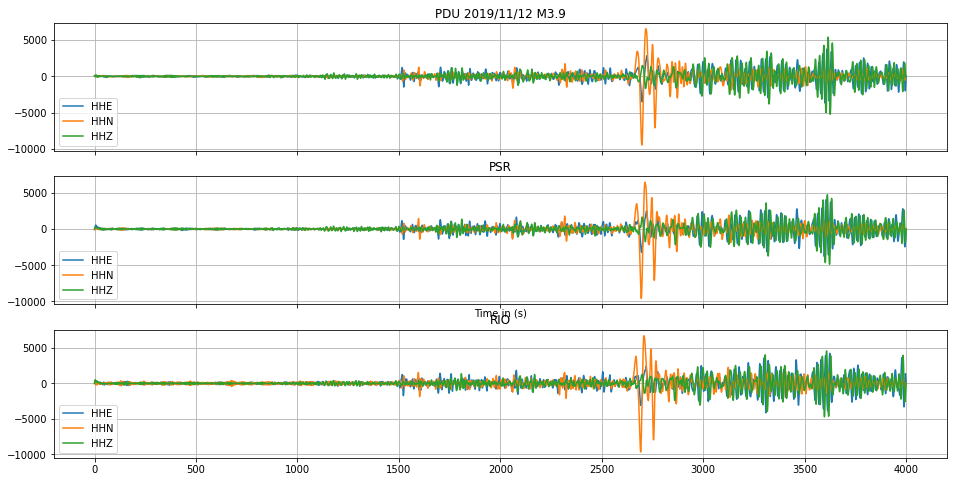

In [ ]:
# Local event waveforms download
t1 = obspy.UTCDateTime(2019,12,15,6,11,51)
client = Client("SCEDC") # connect to IRIS earthquake service
tr=client.get_waveforms(network="CI",station="PDU,PSR,RIO",location="*",channel="HH*",starttime=t1,endtime=t1+4000)
tr.filter('bandpass', freqmin=0.01, freqmax=0.1, corners=2, zerophase=True)
print(tr)
fig,ax=plt.subplots(3,1,figsize=(16,8),sharex=True)

istart=00
iend=len(tr[0].data)
t=np.linspace(0,(iend-istart)/100,(iend-istart))

ax[0].plot(t,tr[0].data[istart:iend])
ax[0].plot(t,tr[1].data[istart:iend])
ax[0].plot(t,tr[2].data[istart:iend])
ax[0].grid(True)
ax[0].set_title(tr[0].stats.station+" 2019/11/12 M3.9")
ax[0].legend((str(tr[0].stats.channel),str(tr[1].stats.channel),str(tr[2].stats.channel)))

ax[1].plot(t,tr[3].data[istart:iend])
ax[1].plot(t,tr[4].data[istart:iend])
ax[1].plot(t,tr[5].data[istart:iend])
ax[1].grid(True)
# ax[1].set_xlim(7000,12500)
ax[1].set_title(tr[3].stats.station)
ax[1].legend((str(tr[3].stats.channel),str(tr[4].stats.channel),str(tr[5].stats.channel)))

ax[2].plot(t,tr[6].data[istart:iend])
ax[2].plot(t,tr[7].data[istart:iend])
ax[2].plot(t,tr[8].data[istart:iend])
ax[2].grid(True)
# ax[2].set_xlim(7000,12500)
ax[2].set_title(tr[6].stats.station)
ax[2].legend((str(tr[6].stats.channel),str(tr[7].stats.channel),str(tr[8].stats.channel)))
ax[1].set_xlabel('Time in (s)')

In [ ]:
# Now let's compare with B1 stations

ff = "/content/drive/Shared drives/BASIN/DATA/sample_events/2019_349.h5"
if 'f' in locals(): f.close()
f = h5py.File(ff,'r')
# cc_len, maxlag = f['meta']['cc_len'][...], f['meta']['maxlag'][...]
L_sta = list(f.keys())
LL = list(f[L_sta[0]]) ;LLL=list(f[L_sta[0]][LL[0]])
data=f[L_sta[0]][LL[0]][LLL[0]][:]
d_len = max(data.shape)
# fs = (d_len - 1) / 2 / maxlag
print(f)
print(L_sta)
print(LL)

TypeError: ignored

ValueError: ignored

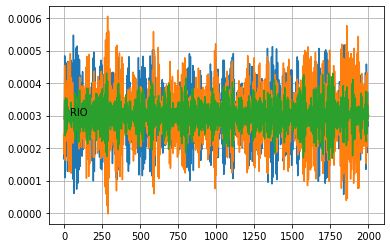

In [ ]:
#Pair RIO with the B1
B1_RIO = ["B1056","B1057","B1058","B1061"]

plt.plot(t,tr[3].data[istart:iend]/7e6+0.0003)
plt.plot(t,tr[4].data[istart:iend]/7e6+0.0003)
plt.plot(t,tr[5].data[istart:iend]/7e6+0.0003)
plt.text(40,0.0003 ,'RIO')
plt.grid(True)
for ii,ib in enumerate(B1_RIO):
  # ik = np.where(np.array(L_sta)==ib)[0]
  data=np.zeros(shape=(3,len(f[ib][LL[0]][LLL[0]][:])))
  data[0,:] = filtfilt(b,a,f[ib][LL[0]][LLL[0]][:])
  data[1,:] = filtfilt(b,a,f[ib][LL[1]][LLL[0]][:])
  data[2,:] = filtfilt(b,a,f[ib][LL[2]][LLL[0]][:])

  # print(ik)
  plt.plot(t,data[:,istart:iend].transpose()-0.0003*ii)
  plt.text(40,-.0003*ii ,ib)
